# <h1 align="center">Student Evaluation for Thermonuclear Supernova Classification via their Multi-Wavelength Signatures</h1>

<h3 align="center">By Alexandros P. Pouroullis</h3>

<h2><ins>Step 1</ins></h2>
<font size="3">Identifying relationships between the 3 observable parameters</font>

In [70]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")

I'll first begin by parsing the contents of the text file. <br>
<p>
    For reference:<br>
    &nbsp; Observable Parameters: <br>
    &emsp;Column 1: $\tau$ (unitless) where $\tau$ is the initial optical depth (higher = more opaque medium)<br>
    &emsp;Column 2: Uncertainty in $\tau$<br>
    &emsp;Column 3: V<sub>max</sub> (s<sup>-1</sup>) where V<sub>max</sub> is the maximum expansion velocity of the ejecta<br>
    &emsp;Column 4: Uncertainty in V<sub>max</sub><br>
    &emsp;Column 5: $\Phi$<sub>300</sub> (photons.cm<sup>-2</sup>.s<sup>-1</sup>) where $\Phi$<sub>300</sub> is the emergent flux of gamma-rays at 300 days post-explosion within the energy band 2 to 4 MeV (10<sup>6</sup><br> &emsp;electronvolts) and at a supernova distance of 20 Mpc (10<sup>6</sup> parsecs).<br>
    &nbsp;Physical Parameters:<br>
    &emsp;Column 6: Total mass ($M_\odot$ – Solar Mass)<br>
    &emsp;Column 7: Mass <sup>56</sup>Ni ($M_\odot$)<br>
    &emsp;Column 8: Explosion energy (10<sup>51</sup> ergs, where 1 erg=10<sup>-7</sup>J)<br>
    &emsp;Column 9: Initial SNeIa mass distribution flag<br>
    &emsp;Column 10: Initial <sup>56</sup>Ni radial distribution flag<br>
</p>
    

In [254]:
observable_parameters_dict = {"tau":[], "tau_uncertainty":[], "vmax":[], "vmax_uncertainty":[], "emergent_flux":[]}


df = pd.read_csv("datacube.txt", sep=' ', header=None, float_precision=None)
# Shuffling data. Setting the 'drop' parameter to True in reset_index() stops pandas from including the previous
# index as a new column in the shuffled dataframe. 
df = df.sample(frac=1).reset_index(drop=True)
df.columns = ['tau', 'tau_uncertainty', 'vmax', 'vmax_uncertainty', 'emergent_flux', 
                'total_mass', 'mass_nickel56', 'explosion_energy', 'initial_mass_distribution_flag', 
                'initial_nickel56_distribution_flag']
obs_params = ['tau', 'vmax', 'emergent_flux']
uncertainty_params = ['tau_uncertainty', 'vmax_uncertainty']
phys_params = ['total_mass', 'mass_nickel56', 'explosion_energy', 
                        'initial_mass_distribution_flag', 'initial_nickel56_distribution_flag']
# splitting the dataframe into two dataframes where one contains the observable and the 
# other the physical parameters.
obs_df = df.loc[:, obs_params]
phys_df = df.loc[:, phys_params]

# previewing the dataframe containing the observable parameters of the first 5 records
obs_df.head()

,tau,vmax,emergent_flux
0,2.432969,0.013352,0.000006
1,2.499268,0.011864,0.000011
2,3.025503,0.013381,0.000011
3,2.459043,0.012328,0.000003
4,2.405630,0.012537,0.000011


I begin with univariate data analysis of the observable parameters.

In [255]:
obs_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tau,512.0,2.576275,0.391005,1.661535,2.321794,2.559251,2.812090,3.621963
vmax,512.0,0.012814,0.000849,0.009842,0.012372,0.012891,0.013388,0.014723
emergent_flux,512.0,0.000007,0.000004,0.000003,0.000003,0.000006,0.000011,0.000015


Here, I create functions to create custom plots using matplotlib for plotting individual variables.

In [48]:
def scatter_plot(x, y, ax, param):
    """Produces a custom labeled scatter plot using matplotlib"""
    ax.scatter(x, y, alpha=0.4)
#     ax.set_title("Scatter Plot of " + param, fontsize=20)
#     ax.set_xlabel("Index of Sample", fontsize=15)
#     ax.set_ylabel(param, fontsize=15)
    return ax

def histogram(x, ax, param, nbins):
    """Produces a custom labeled histogram using matplotlib"""
    ax.hist(x, bins=nbins)
#     ax.set_title("Distribution of " + param, fontsize=20)
#     ax.set_xlabel(param, fontsize=15)
#     ax.set_ylabel("Count", fontsize=15)
    return ax

def violinplot(x, ax, param):
    """Produces a horizontal box and whisker diagram using matplotlib"""
    # setting vert to False produces a horizontal box and whisker diagram
    ax.violinplot(x, vert=False, showmedians=True)
#     ax.set_title("Violin Plot of " + param, fontsize=20)
#     ax.set_ylabel(param, fontsize=15)
    return ax

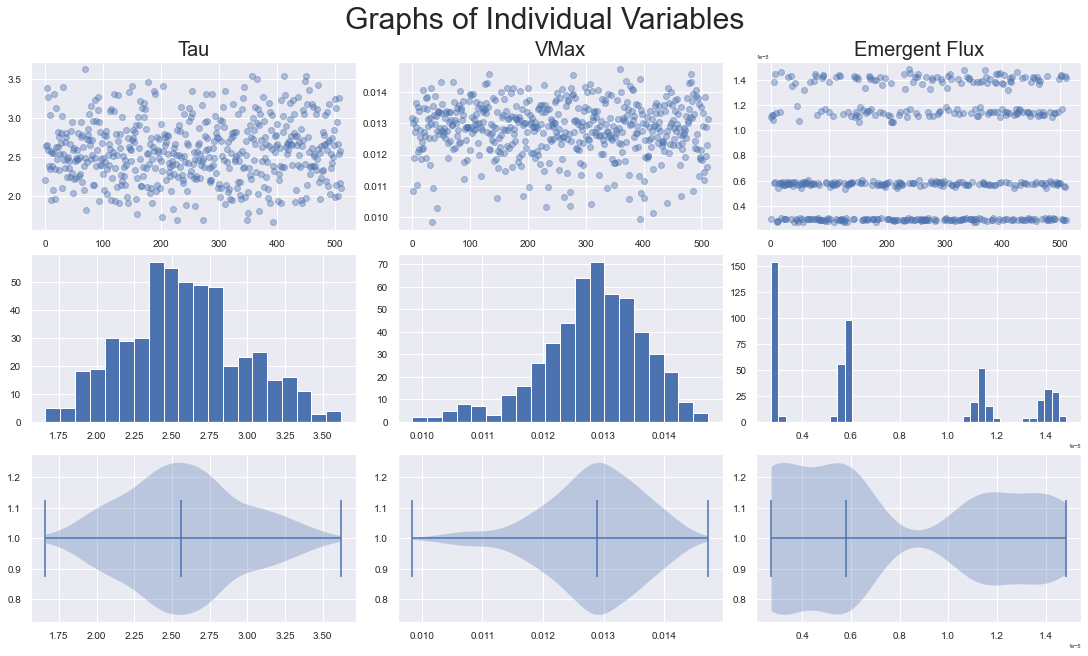

In [58]:
fig, ax = plt.subplots(nrows=3, ncols=3,constrained_layout=True)
fig.set_size_inches(15, 9)
fig.suptitle("Graphs of Individual Variables", fontsize=30)

for axes in ax.flatten():
    axes.tick_params(axis='x', labelsize=10)
    axes.tick_params(axis='y', labelsize=10)

ax[0, 0].set_title("Tau", fontsize=20)

ax[0, 1].set_title("VMax", fontsize=20)

ax[0, 2].set_title("Emergent Flux", fontsize=20)

scatter_plot(obs_df.index, obs_df["tau"], ax[0, 0], "Tau")
scatter_plot(obs_df.index, obs_df["vmax"], ax[0, 1], "Vmax")
scatter_plot(obs_df.index, obs_df["emergent_flux"], ax[0, 2], "Emergent Flux")


histogram(obs_df["tau"], ax[1, 0], "Tau", 20)
histogram(obs_df["vmax"], ax[1, 1], "Vmax", 20)
histogram(obs_df["emergent_flux"], ax[1, 2], "Emergent Flux", 40)

violinplot(obs_df["tau"], ax[2, 0], "Tau")
violinplot(obs_df["vmax"], ax[2, 1], "Vmax")
violinplot(obs_df["emergent_flux"], ax[2, 2], "Emergent Flux");

Some important details immediately become evident. 
<br>
Tau seems to be quite randomly distributed, though there is some concentration in the range of 2.3 to 2.8, with the most prominent band being ~2.4. 
<br>
Vmax is more clearly concentrated at ~0.013.
<br>
Emergent flux appears to be the most interesting: it's clearly split into 4 narrow bands, 0.2, 0.6, 1.15 and 1.4 ( all on the scale 1e-5).

In [256]:
obs_df.corr()

,tau,vmax,emergent_flux
tau,1.000000,0.139121,0.632440
vmax,0.139121,1.000000,-0.256229
emergent_flux,0.632440,-0.256229,1.000000


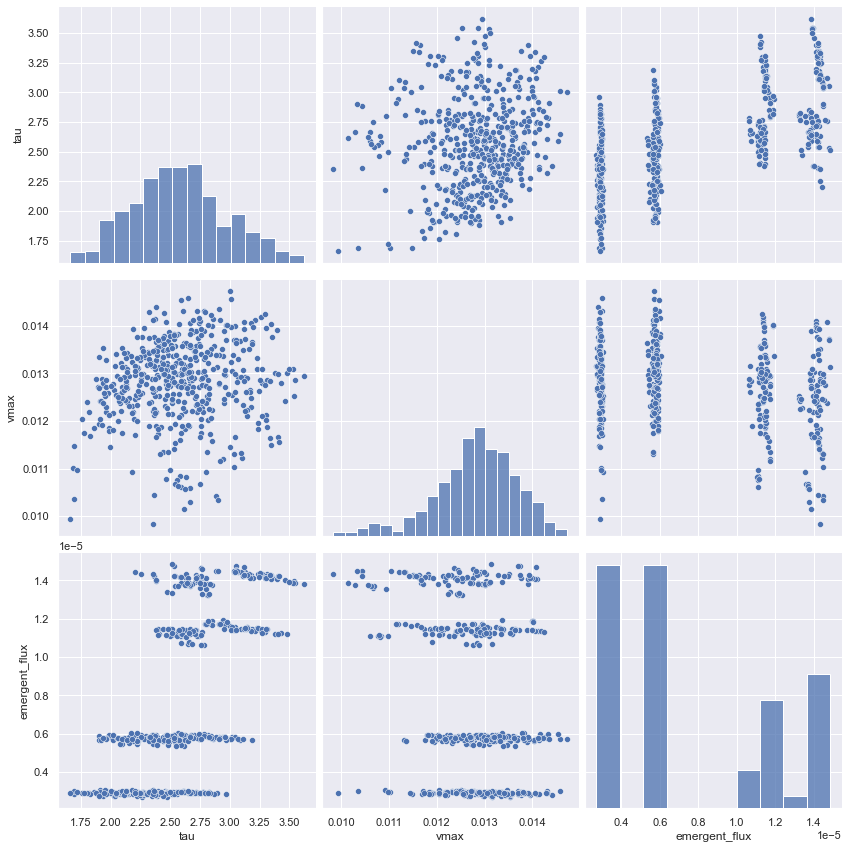

In [257]:
sns.pairplot(obs_df, kind='scatter', height=4);
sns.set_context("notebook", font_scale=0.5) 

There's minor positive correlation between tau and the emergent flux, but it doesn't seem to be anything particularly meaningful.
Otherwise, there seems to be no linear relationship between the observable parameters.

I can't seem to find any other links between the observable parameters, so I'll move on to step 2.

---

<h2><ins>Step 2</ins></h2>
<font size="3">Identifying relationships between the observable and physical parameters</font>

Before analysing the relationships between the observable and physical parameters, I'll begin with exploring the physical parameters.

In [32]:
phys_df.head()

,total_mass,mass_nickel56,explosion_energy,initial_mass_distribution_flag,initial_nickel56_distribution_flag
0,1.00,0.15,2.00,mwd,w7dt
1,2.00,0.75,2.00,mwd,N100
2,0.75,0.15,2.00,N100,w7dt
3,1.40,0.60,2.00,mwd,w7dt
4,1.80,0.60,0.75,hed8,w7dt


From this preview of the data, it can be seen that the numerical data of the physical parameters are all likely discrete. I'll verify this by viewing the count of distinct values in each column.

In [252]:
for param in phys_params:
    print(phys_df[param].value_counts(), '\n')

2.00    128
1.80    128
1.40    128
1.00     64
0.75     64
Name: total_mass, dtype: int64 

0.15    160
0.30    160
0.60     96
0.75     96
Name: mass_nickel56, dtype: int64 

2.00    256
0.75    256
Name: explosion_energy, dtype: int64 

N100    128
w7dt    128
mwd     128
hed8    128
Name: initial_mass_distribution_flag, dtype: int64 

mwd     128
hed8    128
w7dt    128
N100    128
Name: initial_nickel56_distribution_flag, dtype: int64 



As expected, the data are indeed discrete.
<br>
The total mass, mass nickel-56, explosion energy, initial mass distribution flag and initial nickel-56 distribution flag are split into 4, 4, 2, 4, and 4 groups respectively. This should make validation simpler since there are distinct outputs associated to the inputs. 
<br><br>
I'll now visualize the frequency that each of these groups occur for each variable using histograms.

In [177]:
def frequency_histogram(param, fig, ax):
    ax.set_xlabel(param, fontsize=15)
    ax.set_ylabel("Frequency", fontsize=15)
    frequency_table = df[param].value_counts()
    # to make matplotlib treat the discrete numerical data as categorical data, 
    # I convert the indexes to strings.
    frequency_table_indexes = [str(index) for index in sorted(frequency_table.index)]
    frequency_table = (frequency_table_indexes, list(frequency_table.values))
    ax.tick_params(axis='both', which='major', labelsize=12)
    return ax.bar(frequency_table[0], frequency_table[1], color='steelblue', edgecolor='black', linewidth=0.3)

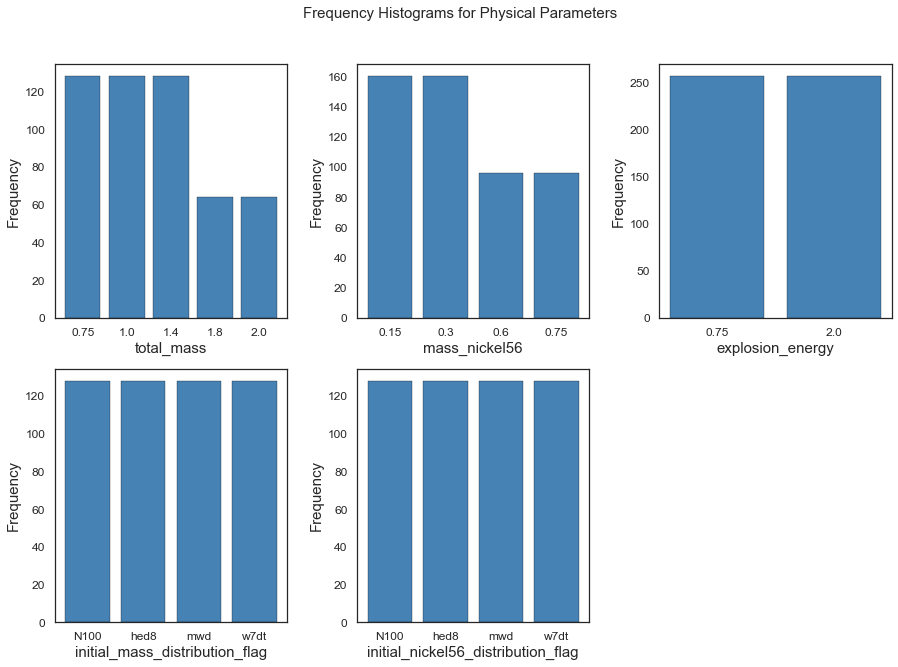

In [178]:
fig = plt.figure(figsize=(15, 10))
title = fig.suptitle("Frequency Histograms for Physical Parameters", fontsize=15)
fig.subplots_adjust(wspace=0.3, hspace=0.2, top=0.90)

for plot_position, param in enumerate(phys_params, start=1):
    ax = fig.add_subplot(2, 3, plot_position)
    frequency_histogram(param, fig, ax)
    

The frequency histograms reveal that there is some imbalance in the representation of total mass of progenitor systems, with there being fewer systems containing a mass above 1.4$M_\odot$; there's also an imbalance in the representation of systems based on their mass <sup>56</sup>Ni – there are fewer samples whose mass <sup>56</sup>Ni is above 0.3$M_\odot$.

The next step is to find some relationship between the observable and physical parameters.
<br>
I'll begin by creating a heat map of correlations between the numerical variables.

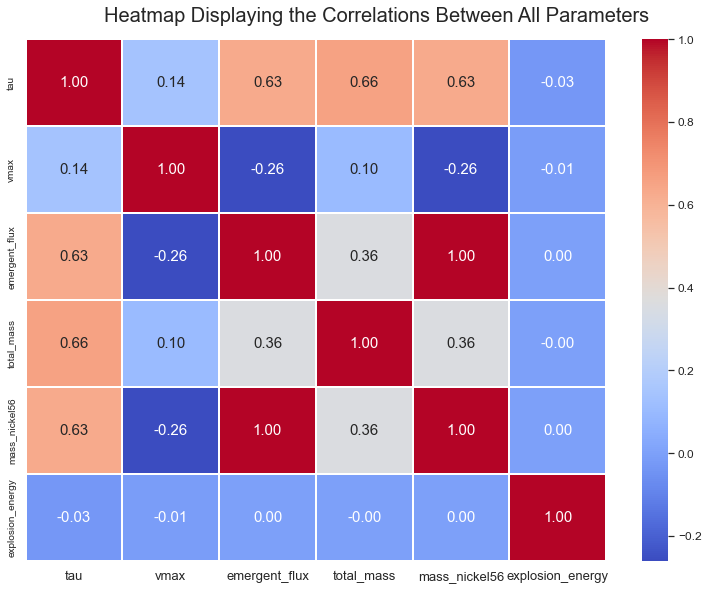

In [179]:
corr_table = df.loc[:, ~df.columns.isin(uncertainty_params)].corr()
fig, ax = plt.subplots(figsize=(13, 9))
fig.suptitle("Heatmap Displaying the Correlations Between All Parameters", fontsize=20)
fig.subplots_adjust(top=0.93)

cmap = sns.color_palette("coolwarm", as_cmap=True)
heat_map = sns.heatmap(round(corr_table, 2), annot=True, annot_kws={"fontsize": 15},
                       ax=ax, cmap=cmap, linewidths=0.05, fmt='.2f')
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=10)
cbar = heat_map.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)



There's a perfect correlation between emergent flux and mass <sup>56</sup>Ni as well as a moderate positive correlation between tau and the total mass of the progenitor system; the former is certainly worth exploring further.

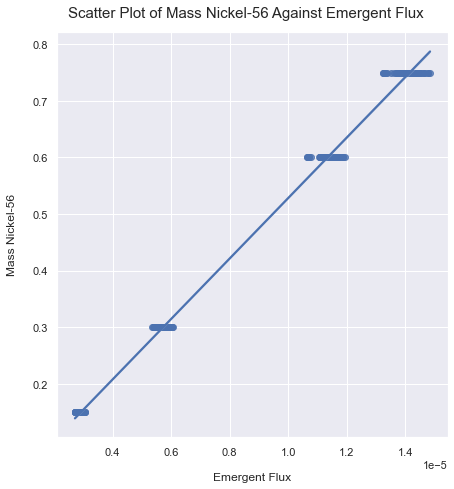

In [242]:
fig, ax = plt.subplots(figsize=(7, 7))
fig.suptitle("Scatter Plot of Mass Nickel-56 Against Emergent Flux", fontsize=15)
fig.subplots_adjust(top = 0.93)

regplot = sns.regplot(x=df["emergent_flux"], y=df["mass_nickel56"], ax=ax)
regplot.set_xlabel("Emergent Flux", fontsize=12)
regplot.xaxis.labelpad = 15
regplot.yaxis.labelpad = 15
regplot.set_ylabel("Mass Nickel-56", fontsize= 12);

As expected, we get a perfect positive linear relationship between emergent flux and mass nickel-56. Not only that, but because emergent flux seems to generally occur in such a narrow bands, determining the mass nickel-56 given the emergent flux will be simple.

I'll now look for any other trends by colour coding scatter plots of the observable parameters with the physical parameters.

In [309]:
def colour_scatterplot(param, ax, hue_param):
    ax = sns.scatterplot(x=df[param].index, y=df[param], hue=df[hue_param], ax=ax)
    ax.set_ylabel(param, fontsize=15)
    return ax

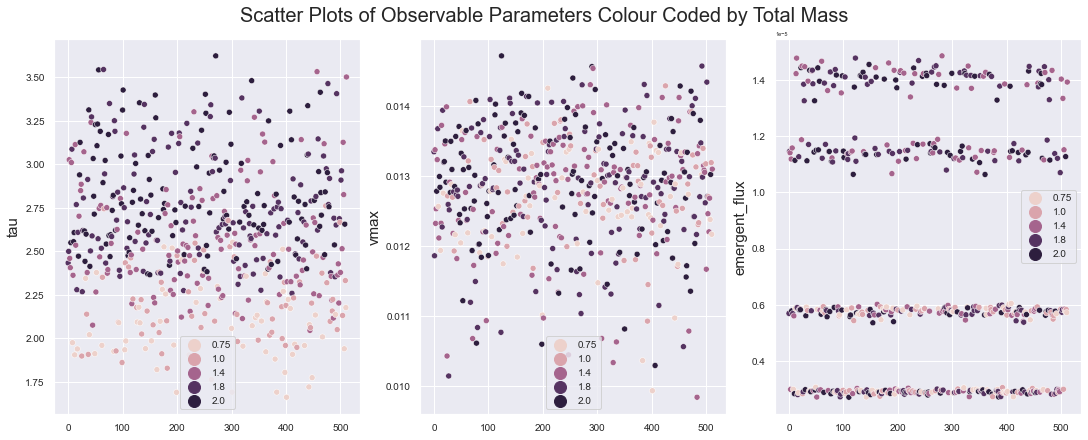

In [318]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), constrained_layout=True)
fig.suptitle("Scatter Plots of Observable Parameters Colour Coded by Total Mass", fontsize=20)

for axes in ax.flatten():
    axes.tick_params(axis="x", labelsize=10)
    axes.tick_params(axis="y", labelsize=10)
for col, obs_param in enumerate(obs_params):
    axes = colour_scatterplot(obs_param, ax[col], "total_mass")
    axes.legend(fontsize=10, markerscale=2)

It can be seen from the above visualizations that the total mass of the progenitor system can somewhat be delineated by different intervals of $\tau$, while the other observable parameters appear to have a random relationship to the total mass. Thus, it's likely that $\tau$ will be an important predictor of total mass. 

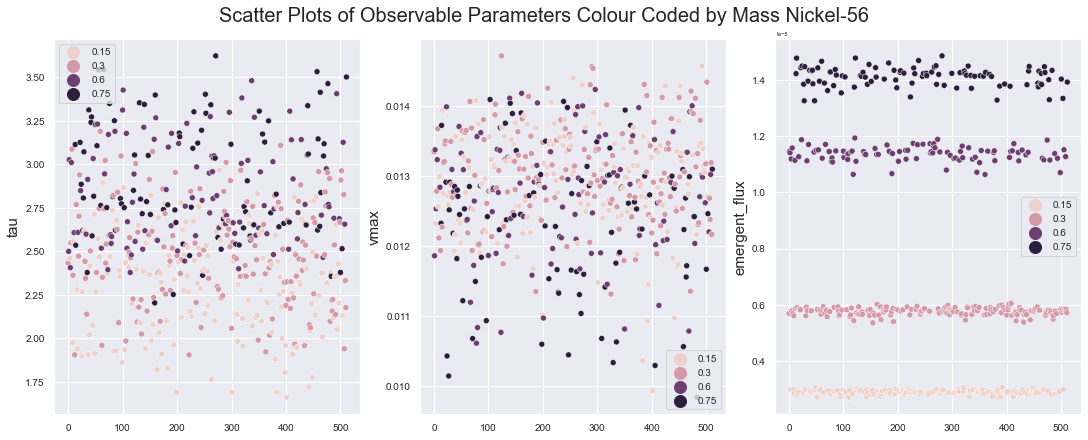

In [323]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), constrained_layout=True)
fig.suptitle("Scatter Plots of Observable Parameters Colour Coded by Mass Nickel-56", fontsize=20)

for axes in ax.flatten():
    axes.tick_params(axis="x", labelsize=10)
    axes.tick_params(axis="y", labelsize=10)
for col, obs_param in enumerate(obs_params):
    axes = colour_scatterplot(obs_param, ax[col], "mass_nickel56")
    axes.legend(fontsize=10, markerscale=2)

Once again, we see that emergent flux is the perfect predictor of mass <sup>56</sup>Ni.

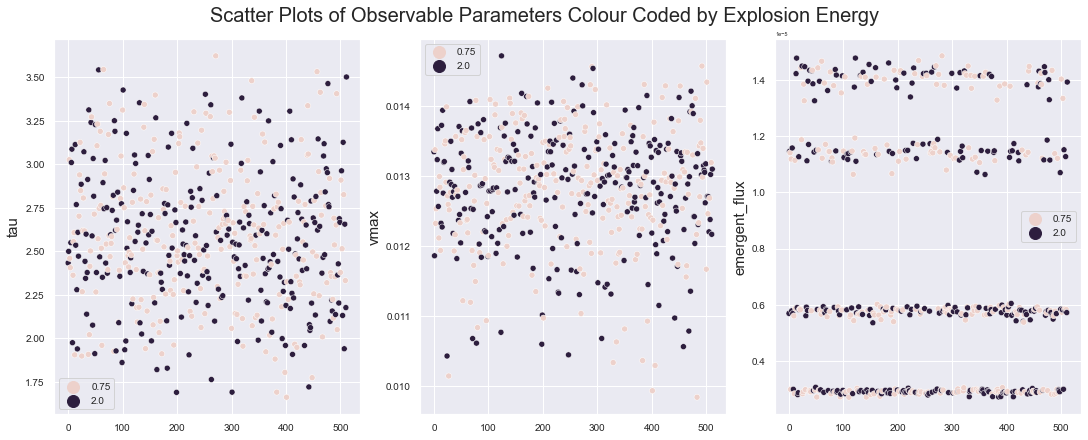

In [322]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), constrained_layout=True)
fig.suptitle("Scatter Plots of Observable Parameters Colour Coded by Explosion Energy", fontsize=20)

for axes in ax.flatten():
    axes.tick_params(axis="x", labelsize=10)
    axes.tick_params(axis="y", labelsize=10)
for col, obs_param in enumerate(obs_params):
    axes = colour_scatterplot(obs_param, ax[col], "explosion_energy")
    axes.legend(fontsize=10, markerscale=2)

I can't identify any relationships between the observable parameters and explosion energy. 

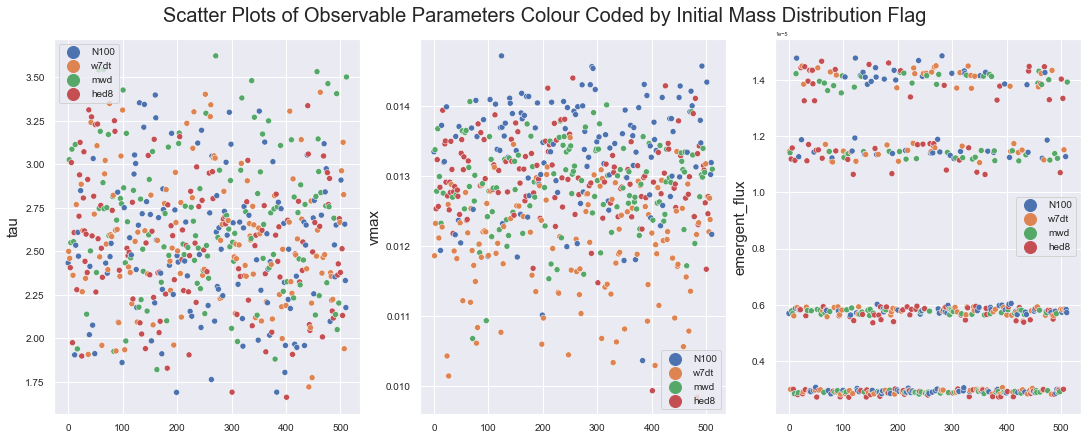

In [324]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), constrained_layout=True)
fig.suptitle("Scatter Plots of Observable Parameters Colour Coded by Initial Mass Distribution Flag", fontsize=20)

for axes in ax.flatten():
    axes.tick_params(axis="x", labelsize=10)
    axes.tick_params(axis="y", labelsize=10)
for col, obs_param in enumerate(obs_params):
    axes = colour_scatterplot(obs_param, ax[col], "initial_mass_distribution_flag")
    axes.legend(fontsize=10, markerscale=2)

The colour coded scatter plot V<sub>max</sub> reveals a vague relationship with the initial mass distribution flags. It seems that a flag of w7dt generally occurs at lower values of V<sub>max</sub>, then mwd in the next band of values, followed by hed8, and finally N100 in the highest band of values. 

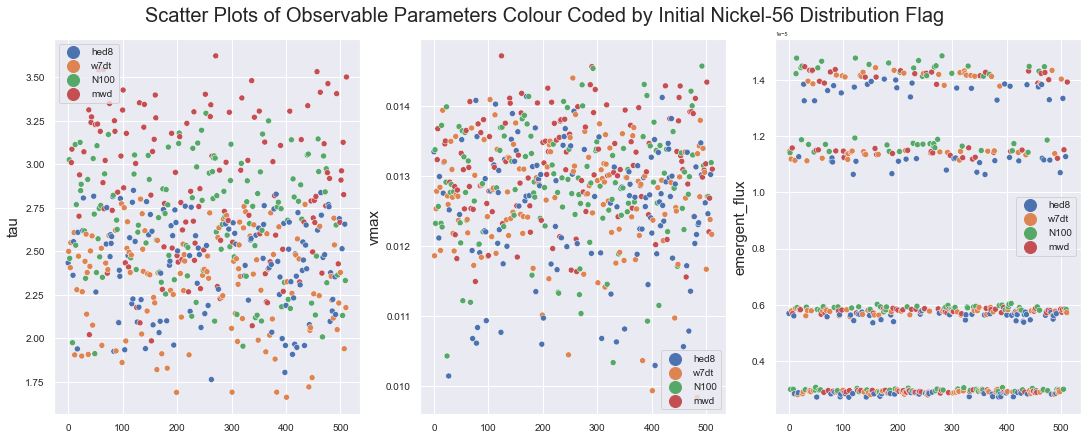

In [325]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), constrained_layout=True)
fig.suptitle("Scatter Plots of Observable Parameters Colour Coded by Initial Nickel-56 Distribution Flag", fontsize=20)

for axes in ax.flatten():
    axes.tick_params(axis="x", labelsize=10)
    axes.tick_params(axis="y", labelsize=10)
for col, obs_param in enumerate(obs_params):
    axes = colour_scatterplot(obs_param, ax[col], "initial_nickel56_distribution_flag")
    axes.legend(fontsize=10, markerscale=2)

Just as V<sub>max</sub> could somewhat be delineated by the initial mass distribution flags, so too can $\tau$ be delineated by initial <sup>56</sup>Ni distribution flags. 
<br>
The order, from smaller to larger values of $\tau$, that the initial <sup>56</sup>Ni distribution flags appear is w7dt, hed8, N100 and mwd respectively. Though there is substantial overlap amongst classes and many outliers.

That brings us to the end of the data exploration phase. Now, onto constructing the machine learning model.

---

<h2><ins>Step 3</ins></h2>
<font size="3">Creating the Machine Learning Model</font>